In [1]:
# pip install altair
# !pip install "vegafuhttp://localhost:8888/notebooks/CP610/Project/Untitled-project.ipynb#sion[embed]>=1.5.0"
# !pip install vega_datasets
# !pip install plotnine

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import shap
import joblib
from sklearn.metrics import f1_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from sklearn.metrics import log_loss

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv("dataset_phishing.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [5]:
df.head()

url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                      1                        0   
1                1                      0                        0   
2                1                      0                        0   
3                1                      0                        0   
4                0                      1                        0   

   domain_registration_length  domain_age  web_traffic  dns_record  \
0                          45          -1            0           1   
1                          77        5767            0           0   
2                          14        4004      5828815           0   
3                          62          -1       107721           0   
4                         224        8175         8725           0   

   google_index  page_rank      status  
0             1          4  legitimate  
1             1          2    phishing  
2             1          0    phishing  
3             0          3  legitimate  
4             0          6  legitimate  

[5 rows x 89 columns]

In [6]:
missingVals=df.isnull().sum()
print("Number of missing values:\n",missingVals)

Number of missing values:
 url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [7]:
# #One-hot encoding
df["phishing_status"]=pd.get_dummies(df["status"])["phishing"].astype("int")
dfEncoded=df.drop("status",axis=1,inplace=False)
print(dfEncoded[["url","phishing_status"]].head(3))

                                                 url  phishing_status
0              http://www.crestonwood.com/router.php                0
1  http://shadetreetechnology.com/V4/validation/a...                1
2  https://support-appleld.com.secureupdate.duila...                1


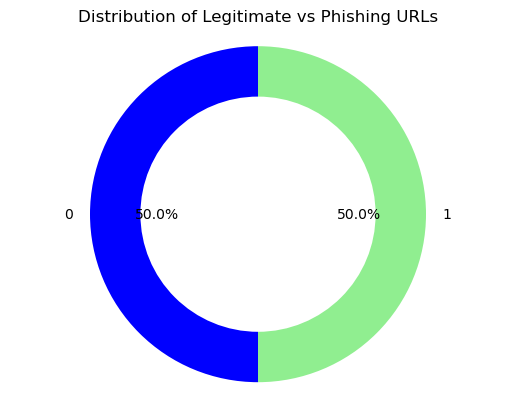

In [8]:
phishing_counts = dfEncoded['phishing_status'].value_counts()
fig, ax = plt.subplots()
ax.pie(phishing_counts, labels=phishing_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'lightgreen'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.title('Distribution of Legitimate vs Phishing URLs')
plt.show()

In [25]:
cat={}
for var in dfEncoded.iloc[:,1:].columns:
    cat[var] = 1.*dfEncoded[var].nunique()/dfEncoded[var].count() < 0.002 

numCols = []
catCols = []
for col in cat.keys():
    if (cat[col] == False):
        numCols.append(col)
    else:
        catCols.append(col)

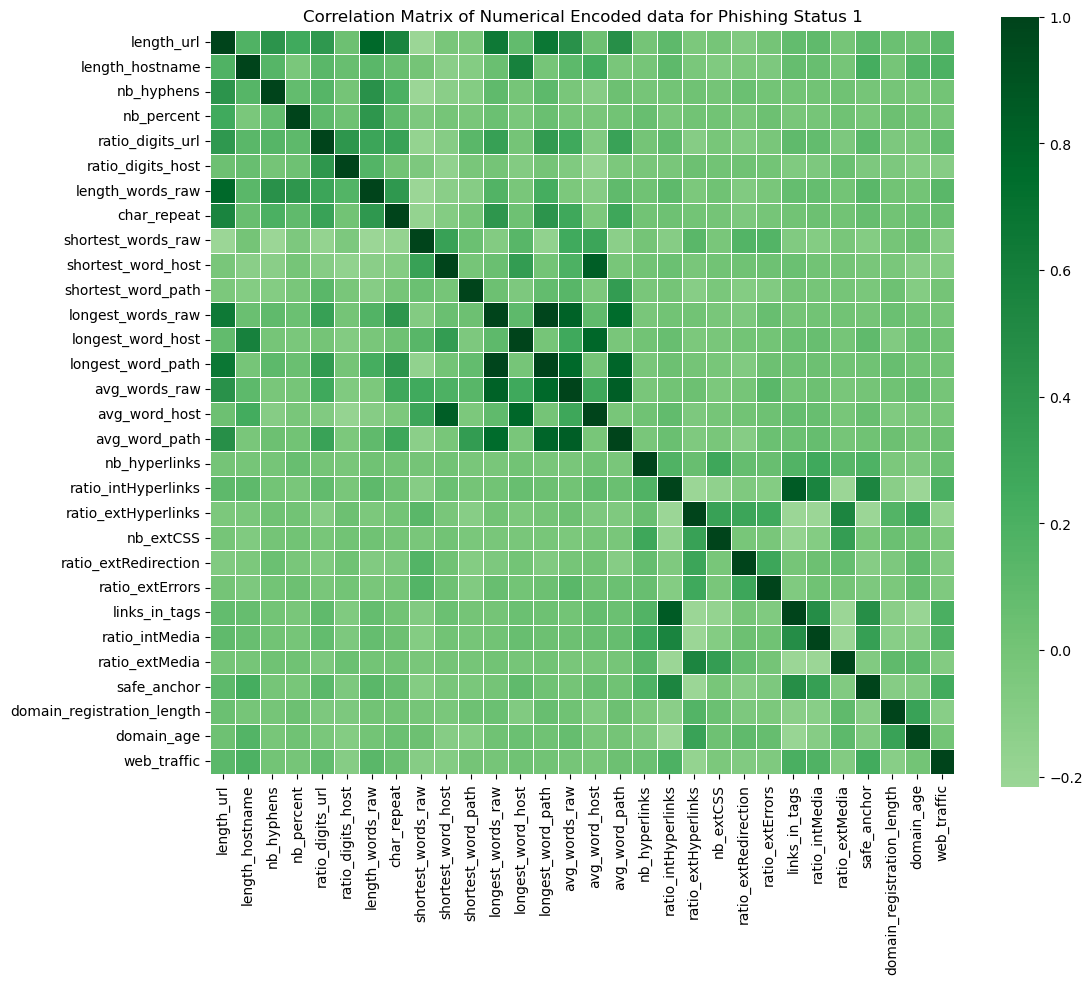

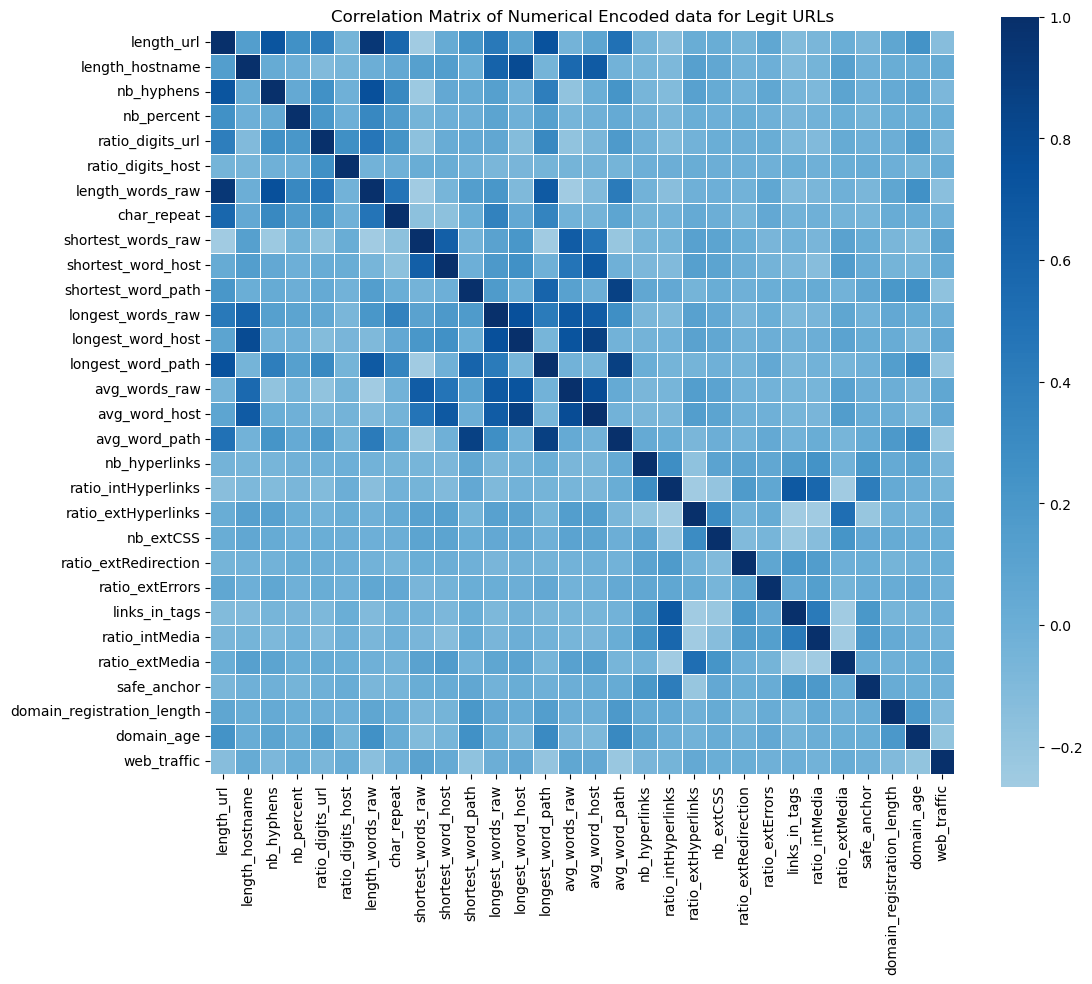

In [10]:
data_phishing_1 = dfEncoded[dfEncoded['phishing_status'] == 1]

corrMat_phishing_1 = data_phishing_1[numCols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corrMat_phishing_1, cmap="Greens", robust=True, center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Encoded data for Phishing Status 1")
plt.show()

data_phishing_0 = dfEncoded[dfEncoded['phishing_status'] == 0]
corrMat_phishing_0 = data_phishing_0[numCols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corrMat_phishing_0, cmap="Blues", robust=True, center=0, square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Encoded data for Legit URLs")
plt.show()

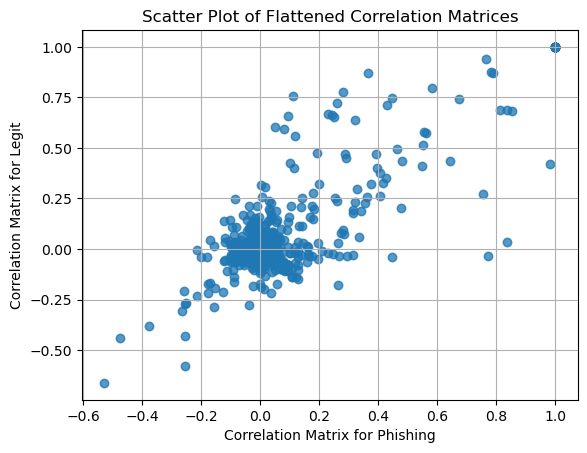

Pearson correlation coefficient: 0.8199359537742041


In [11]:
corrMat_phishing_1_flat = corrMat_phishing_1.to_numpy().flatten()
corrMat_phishing_0_flat = corrMat_phishing_0.to_numpy().flatten()
pearson_corr = np.corrcoef(corrMat_phishing_1_flat, corrMat_phishing_0_flat)[0, 1]
plt.scatter(corrMat_phishing_1_flat, corrMat_phishing_0_flat, alpha=0.5)
plt.title("Scatter Plot of Flattened Correlation Matrices")
plt.xlabel("Correlation Matrix for Phishing")
plt.ylabel("Correlation Matrix for Legit")
plt.grid(True)
plt.show()
print("Pearson correlation coefficient:", pearson_corr)

**Pearson correlation coefficient of 0.8199** indicates a strong positive linear relationship between the elements of the two flattened correlation matrices for Phishing and Legit URLs.

Insights:
1. Strong Positive Correlation: The majority of the data points in the scatter plot are clustered around a line with a positive slope, indicating that as the values in phishing matrix, the values in the legit matrix tends to increase as well.
2. Similar Patterns: The two correlation matrices exhibit similar patterns or tendencies in terms of how their elements are correlated with each other.
3. Consistency: The patterns of correlations observed in one matrix are consistent with those in the other matrix.
4. Potential overlap: Both matrices contain overlapping information.

Overall, the high Pearson correlation coefficient suggests a strong relationship between the two correlation matrices, indicating that they convey similar information about the  data.

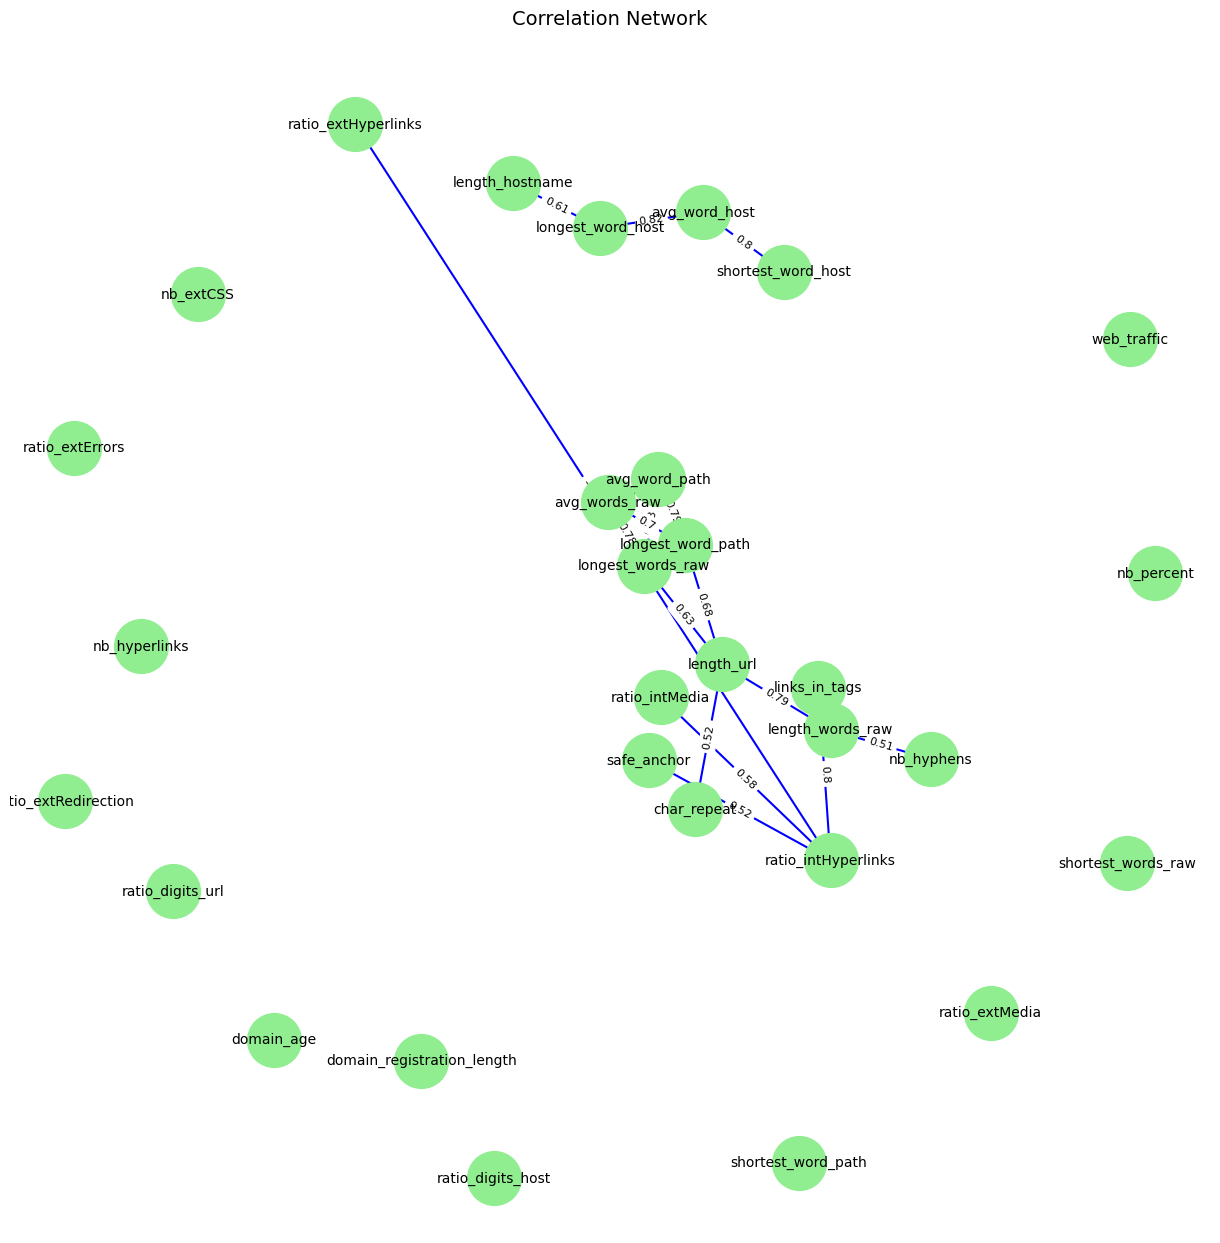

In [12]:
corrMat=dfEncoded[numCols].corr()
g=nx.Graph()
for node in corrMat:
    g.add_node(node)
    
for i in range(len(corrMat.columns)):
    for j in range(i+1, len(corrMat.columns)):
        if abs(corrMat.iloc[i, j]) > 0.5:  # You can adjust the threshold as needed
            g.add_edge(corrMat.columns[i], corrMat.columns[j], weight=corrMat.iloc[i, j])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(g, k=0.15, iterations=20)
nx.draw(g, pos, with_labels=True, node_size=1500, font_size=10, node_color='lightgreen', edge_color='blue', width=1.5)
nx.draw_networkx_edge_labels(g, pos, edge_labels={(u, v): round(d['weight'], 2) for u, v, d in g.edges(data=True)}, font_size=8)
plt.title('Correlation Network', fontsize=14)
plt.axis('off')
plt.show()

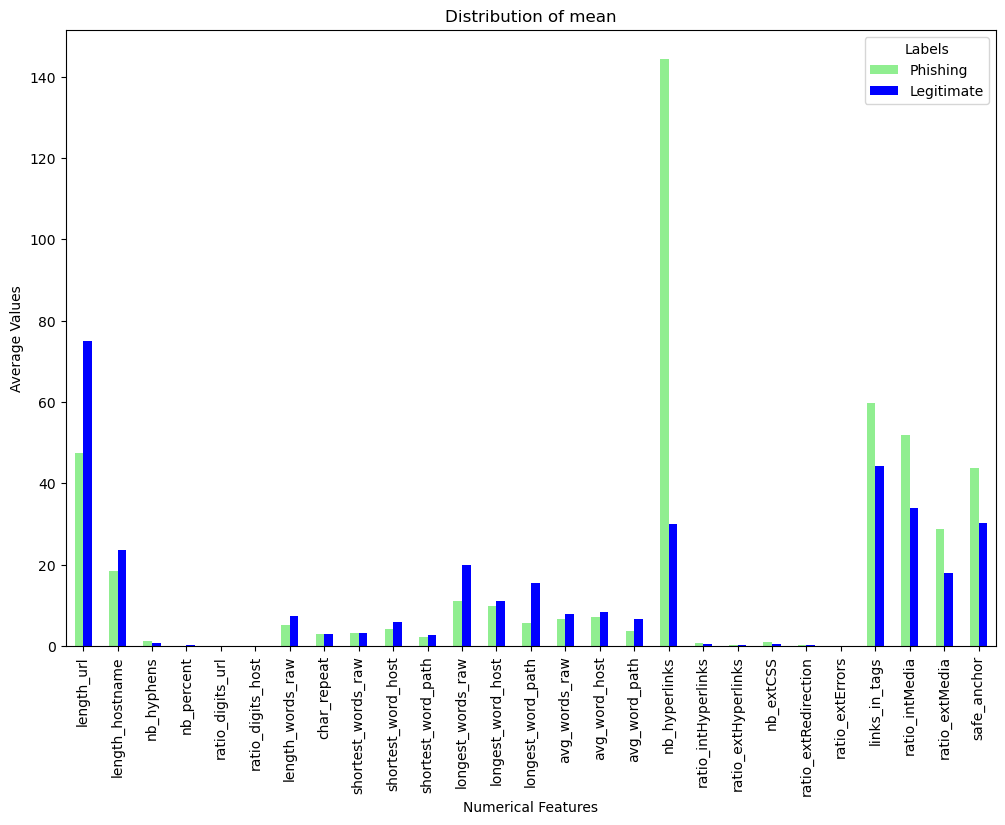

In [13]:
dfDist =dfEncoded.groupby("phishing_status")[numCols].mean().reset_index().T
ax = dfDist[1:-3][[0,1]].plot(kind="bar", title ="Distribution of mean", figsize=(12, 8), legend=True,color=["lightgreen","blue"])
ax.set_xlabel("Numerical Features")
ax.set_ylabel("Average Values")
ax.legend(["Phishing","Legitimate",], title="Labels")
plt.show()

Insights: 

1. **Length-related features**:
   - Phishing URLs tend to have longer lengths for both URL and hostname compared to legitimate URLs.
   - Phishing URLs generally have more hyphens and percentage characters in the URL.
   - The average number of words in raw text is higher for phishing URLs.

2. **Character-related features**:
   - There is a slight increase in character repetition for phishing URLs compared to legitimate ones.

3. **Word-related features**:
   - Phishing URLs tend to have longer shortest and longest words in both the hostname and path.
   - The average number of words in the path is notably higher for phishing URLs.

4. **Hyperlink-related features**:
   - Phishing URLs have a significantly higher number of hyperlinks, both internal and external.
   - The ratio of internal hyperlinks is higher for phishing URLs compared to legitimate ones.

5. **Media-related features**:
   - Phishing URLs have higher ratios of internal and external media.

6. **Anchor-related feature**:
   - Phishing URLs have a higher percentage of safe anchors.

7. **Domain-related features**:
   - Phishing URLs tend to have longer domain registration lengths and younger domain ages compared to legitimate URLs.

8. **Web traffic**:
   - Phishing URLs have slightly lower web traffic on average compared to legitimate ones.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


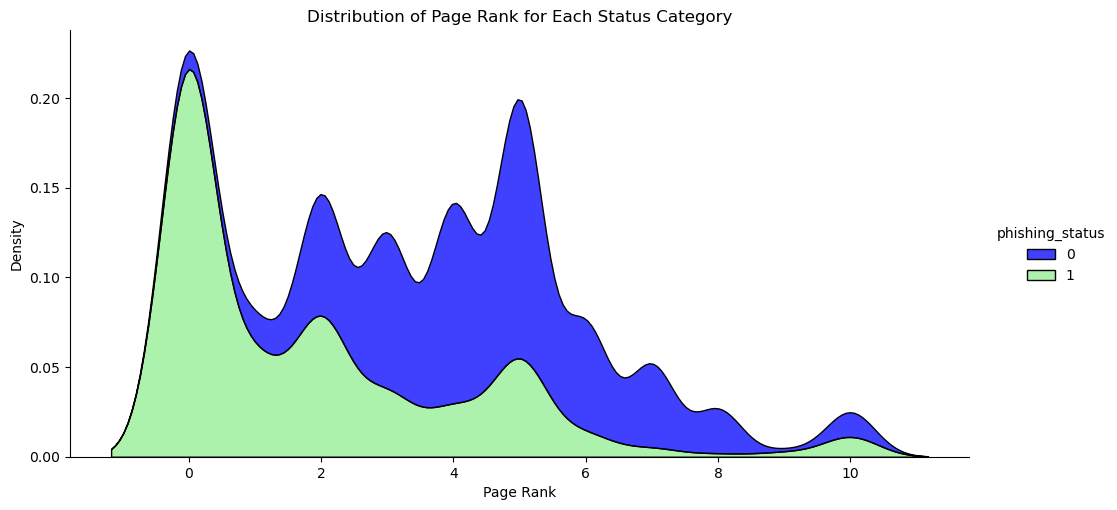

In [14]:
sns.displot(data=dfEncoded, x="page_rank", hue="phishing_status", kind="kde", multiple="stack", aspect=2, palette={0: "blue", 1: "lightgreen"})
plt.title('Distribution of Page Rank for Each Status Category')
plt.xlabel('Page Rank')
plt.ylabel('Density')
plt.show()

Insights for the statistical description of page ranks based on phishing status:

1) The mean page rank for phishing URLs **(1.89)** is notably lower than that for legitimate URLs **(4.48)**, indicating that phishing URLs tend to have lower page ranks compared to legitimate ones.

2) The standard deviation of page ranks for phishing URLs **(2.37)** is larger than that for legitimate URLs **(1.98)**, suggesting higher variability in page ranks among phishing URLs.

3) Both phishing and legitimate URLs exhibit a wide range of page ranks, from 0 to 10. This implies that both types of URLs can have varying degrees of authority and relevance on the web.

4) For phishing URLs, **25%** have a page rank of 0, while for legitimate URLs, **25%** have a page rank of 3 or lower. This indicates that a significant portion of phishing URLs have relatively low page ranks compared to legitimate ones.

5) The distribution of page ranks for phishing URLs is skewed towards lower values, with 75% having a page rank of 3 or lower. In contrast, the distribution of page ranks for legitimate URLs is more evenly spread, with 75% having a page rank of 6 or lower.


In [15]:
data_3d=['length_url','length_hostname','ratio_digits_url']
data3d=df[data_3d]
data_phishing_1 = data3d[dfEncoded['phishing_status'] == 1]

fig1 = go.Figure(data=[go.Scatter3d(
    x=data_phishing_1['length_url'],
    y=data_phishing_1['length_hostname'],
    z=data_phishing_1['ratio_digits_url'],
    mode='markers',
    marker=dict(
        size=5,
        color='lightgreen',
        opacity=0.8
    ),
    name='Phishing Status 1'
)])

fig1.update_layout(
    scene=dict(
        xaxis_title='Length of URL',
        yaxis_title='Length of Hostname',
        zaxis_title='Ratio of Digits in URL',
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ),
    title='3D Scatter Plot for Phishing Links'
)

data_phishing_0 = data3d[dfEncoded['phishing_status'] == 0]

fig0 = go.Figure(data=[go.Scatter3d(
    x=data_phishing_0['length_url'],
    y=data_phishing_0['length_hostname'],
    z=data_phishing_0['ratio_digits_url'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',  
        opacity=0.8
    ),
    name='Phishing Status 0'
)])

fig0.update_layout(
    scene=dict(
        xaxis_title='Length of URL',
        yaxis_title='Length of Hostname',
        zaxis_title='Ratio of Digits in URL',
        aspectratio=dict(x=1, y=1, z=1),
        aspectmode='manual'
    ),
    title='3D Scatter Plot for Legitimate links'
)

fig1.show()
fig0.show()

>1.It is evident at first glance that the length of phishing URLs generally exceeds the length of legitimate URLs.

>2.Phishing URLs also tend to contain almost double the digits in legitimate URLs.

>3.The cluster of length of hostname for legitimate URLs shows that it remains around the 60 range, whereas phishing ones exceed it.

### Phishing URL (Phishing Status 1):
- **Length of URL**: The average length of phishing URLs is approximately 74.87 characters, with a standard deviation of 70.44. The lengths range from 15 to 1641 characters. 50% of the phishing URLs have a length of 55 characters or less.
  
- **Length of Hostname**: The average length of hostnames in phishing URLs is around 23.66 characters, with a standard deviation of 13.77. The lengths vary from 4 to 214 characters. 50% of the hostnames in phishing URLs have a length of 21 characters or less.
  
- **Ratio of Digits in URL**: The average ratio of digits in phishing URLs is about 0.08498, with a standard deviation of 0.10845. The ratios range from 0 to 0.72388. 50% of the phishing URLs have a ratio of digits of approximately 0.039 or less.

### Legitimate URL (Phishing Status 0):
- **Length of URL**: The average length of legitimate URLs is approximately 47.38 characters, with a standard deviation of 27.86. The lengths range from 12 to 557 characters. 50% of the legitimate URLs have a length of 41 characters or less.
  
- **Length of Hostname**: The average length of hostnames in legitimate URLs is around 18.52 characters, with a standard deviation of 5.43. The lengths vary from 5 to 66 characters. 50% of the hostnames in legitimate URLs have a length of 18 characters or less.
  
- **Ratio of Digits in URL**: The average ratio of digits in legitimate URLs is about 0.02129, with a standard deviation of 0.04671. The ratios range from 0 to 0.36508. 50% of the legitimate URLs have a ratio of digits of 0 or less.

### Insights:
- Phishing URLs tend to have longer lengths and higher variability compared to legitimate URLs, as indicated by higher mean values and larger standard deviations for both length of URL and length of hostname.
- The ratio of digits in phishing URLs is notably higher compared to legitimate URLs, suggesting a potential pattern exploited by phishing attacks to deceive users.

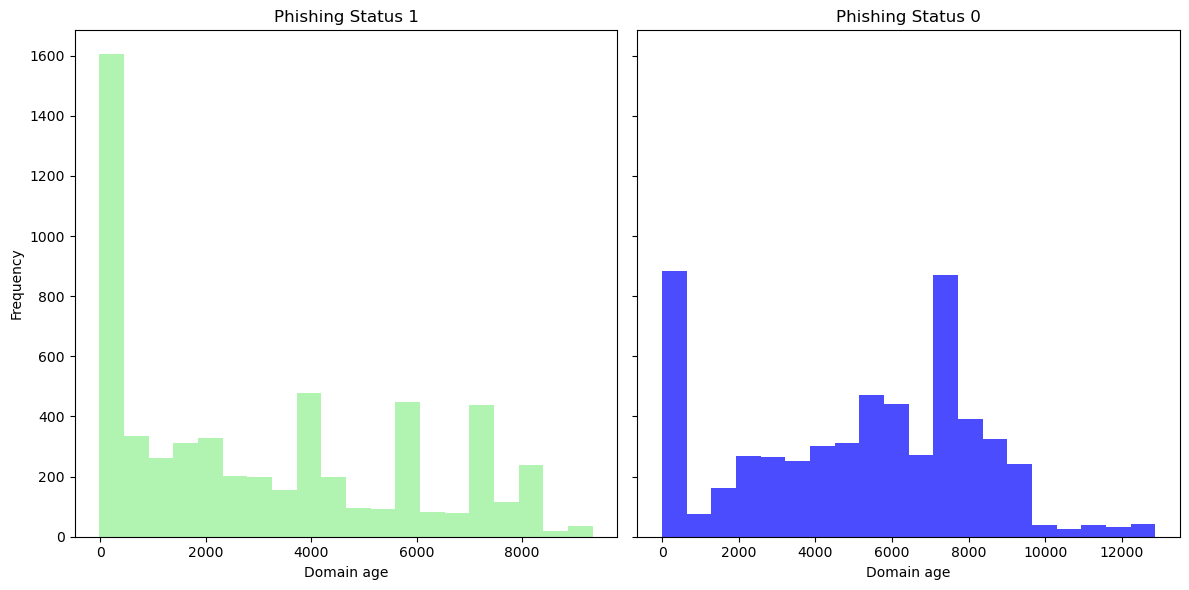

In [16]:
data_combined = dfEncoded[['domain_age', 'phishing_status']]
data_phishing_1 = data_combined[data_combined['phishing_status'] == 1]
data_phishing_0 = data_combined[data_combined['phishing_status'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].hist(data_phishing_1['domain_age'], bins=20, color='lightgreen', alpha=0.7)
axes[0].set_title('Phishing Status 1')
axes[0].set_xlabel('Domain age')
axes[0].set_ylabel('Frequency')
axes[1].hist(data_phishing_0['domain_age'], bins=20, color='blue', alpha=0.7)
axes[1].set_title('Phishing Status 0')
axes[1].set_xlabel('Domain age')
plt.tight_layout()
plt.show()

These statistics provide insights into the distribution of domain ages for websites with phishing status 1 and phishing status 0:

For Phishing Status 1:
- **Mean**: The average domain age for websites with phishing status 1 is approximately 3031 days.
- **Standard Deviation**: The domain ages vary around the mean by approximately 2752 days on average.
- **25th Percentile (Q1)**: 25% of the domain ages fall below 253 days.
- **Median (50th Percentile or Q2)**: The median domain age is 2352 days, meaning that 50% of the domain ages are below this value.
- **75th Percentile (Q3)**: 75% of the domain ages fall below 5613 days.
- **Maximum**: The maximum domain age is 9339 days.

For Legitimate URLs:
- **Mean**: The average domain age for websites with phishing status 0 is approximately 5094 days, which is higher than that for phishing urls.
- **Standard Deviation**: The domain ages vary around the mean by approximately 3101 days on average, which is slightly higher than that for phishing urls.
- **25th Percentile (Q1)**: 25% of the domain ages fall below 2675 days.
- **Median (50th Percentile or Q2)**: The median domain age is 5563 days, similar to phishing urls.
- **75th Percentile (Q3)**: 75% of the domain ages fall below 7447 days, which is lower than that for phishing urls.
- **Maximum**: The maximum domain age is 12874 days, which is higher than that for phishing urls.

Overall, these statistics indicate differences in the distribution of domain ages between phishing and legit websites with , with legit urls generally having higher average and maximum domain ages compared to phishing urls. Additionally, both datasets have anomalous negative values for domain age, which may require further investigation.

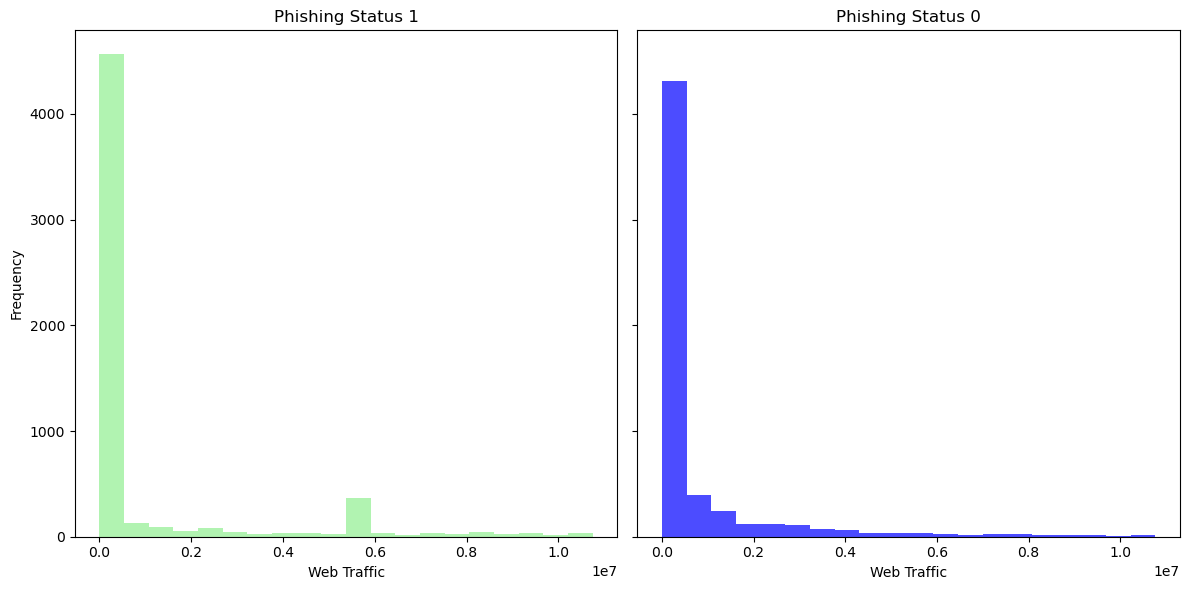

In [17]:
data_combined1 = dfEncoded[['web_traffic', 'phishing_status']]
data_phishing_1 = data_combined1[data_combined1['phishing_status'] == 1]
data_phishing_0 = data_combined1[data_combined1['phishing_status'] == 0]
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axes[0].hist(data_phishing_1['web_traffic'], bins=20, color='lightgreen', alpha=0.7)
axes[0].set_title('Phishing Status 1')
axes[0].set_xlabel('Web Traffic')
axes[0].set_ylabel('Frequency')
axes[1].hist(data_phishing_0['web_traffic'], bins=20, color='blue', alpha=0.7)
axes[1].set_title('Phishing Status 0')
axes[1].set_xlabel('Web Traffic')
plt.tight_layout()
plt.show()

These statistics provide insights into the distribution of web traffic for phishing and legitimate websites:

For Phishing:
- **Mean**: The average web traffic for phishing websites is approximately 977,261.
- **Standard Deviation**: The web traffic varies around the mean by approximately 2,259,870 on average.
- **Minimum**: The minimum web traffic observed is 0.
- **25th Percentile (Q1)**: 25% of phishing websites have web traffic below 0.
- **Median (50th Percentile or Q2)**: The median web traffic is also 0, indicating that half of the phishing websites have no web traffic.
- **75th Percentile (Q3)**: 75% of phishing websites have web traffic below 77,586.
- **Maximum**: The maximum observed web traffic for phishing websites is 10,750,000.

For Legitimate:
- **Mean**: The average web traffic for legitimate websites is approximately 736,252.
- **Standard Deviation**: The web traffic varies around the mean by approximately 1,682,119 on average.
- **Minimum**: The minimum web traffic observed is 0.
- **25th Percentile (Q1)**: 25% of legitimate websites have web traffic below 340.
- **Median (50th Percentile or Q2)**: The median web traffic is 25,176, indicating that half of the legitimate websites have web traffic below this value.
- **75th Percentile (Q3)**: 75% of legitimate websites have web traffic below 516,310.
- **Maximum**: The maximum observed web traffic for legitimate websites is 10,767,990.

These statistics suggest that, on average, phishing websites tend to have higher web traffic compared to legitimate websites. However, it's important to note that a significant portion of both phishing and legitimate websites have zero web traffic. Additionally, the range of web traffic values for both categories is quite large, indicating a wide variability in web traffic among these websites.

In [18]:
X = dfEncoded.drop(["phishing_status", "url"], axis=1)
Y = dfEncoded["phishing_status"]

Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

SP = SelectPercentile(score_func=f_classif, percentile=60)
X_selected = SP.fit_transform(X_scaled, Y)

x_train, x_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.20, random_state=10, shuffle=True)

models = {
#     "MLPClassifier": MLPClassifier(solver='adam', alpha=0.01, hidden_layer_sizes=(100, 100, 100, 100), max_iter=100, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
#     "SVC": SVC(kernel='linear', random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoostClassifier": AdaBoostClassifier(n_estimators=100, random_state=42),
#     "KNeighborsClassifier": KNeighborsClassifier(),
    "GaussianNB": GaussianNB()
}

accuracyScores=[]
f1Scores=[]
feature_importance_scores = {}
best_accuracy = 0
best_model = None

for name, model in models.items():
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    print(name, accuracy)
    accuracyScores.append(accuracy)
    
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='binary')
    print(name, f1)
    f1Scores.append(f1)
    
    if hasattr(model, 'feature_importances_'):
        feature_importance_scores[name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        feature_importance_scores[name] = model.coef_[0]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

if best_model is not None:
    joblib.dump(best_model, 'best_phishing_detection_model.pkl')
    print(f"Best Model {best_model} saved with accuracy:{best_accuracy}" )
    print(".pkl file created")
else:
    print("No model was found to be trained.")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [ 8 59 61 63 68 71] are constant.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



RandomForestClassifier 0.9623797025371829
RandomForestClassifier 0.9618456078083407
LogisticRegression 0.9435695538057742
LogisticRegression 0.9427430093209055
GradientBoostingClassifier 0.9571303587051618
GradientBoostingClassifier 0.9564831261101243
AdaBoostClassifier 0.9479440069991251
AdaBoostClassifier 0.9471346068414038
GaussianNB 0.757655293088364
GaussianNB 0.6929046563192905
Best Model RandomForestClassifier(random_state=42) saved with accuracy:0.9623797025371829
.pkl file created


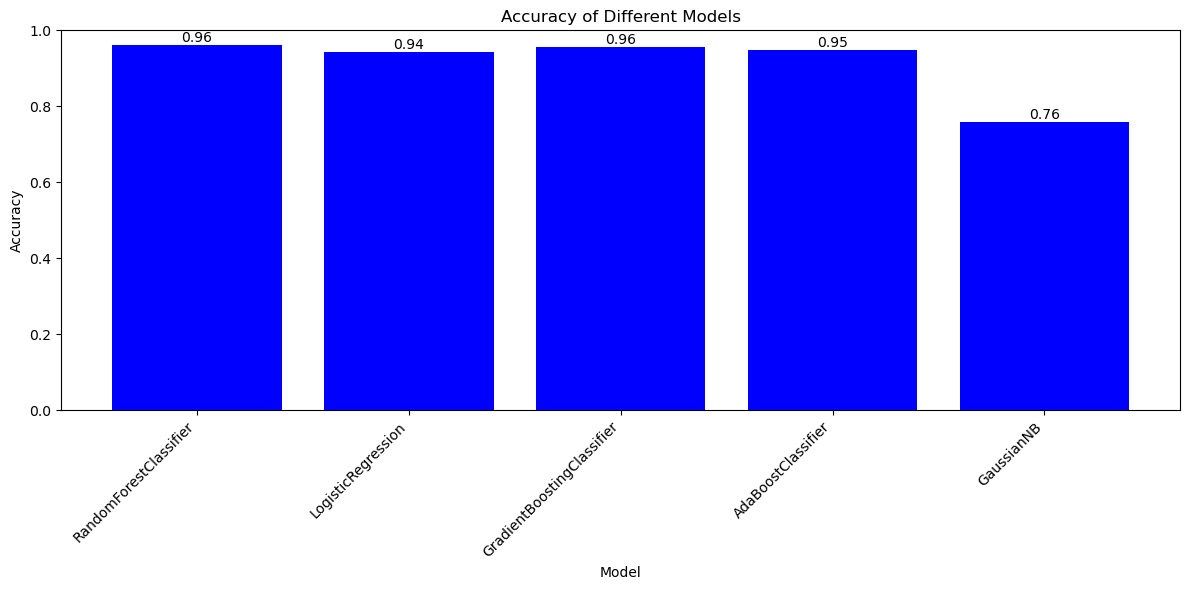

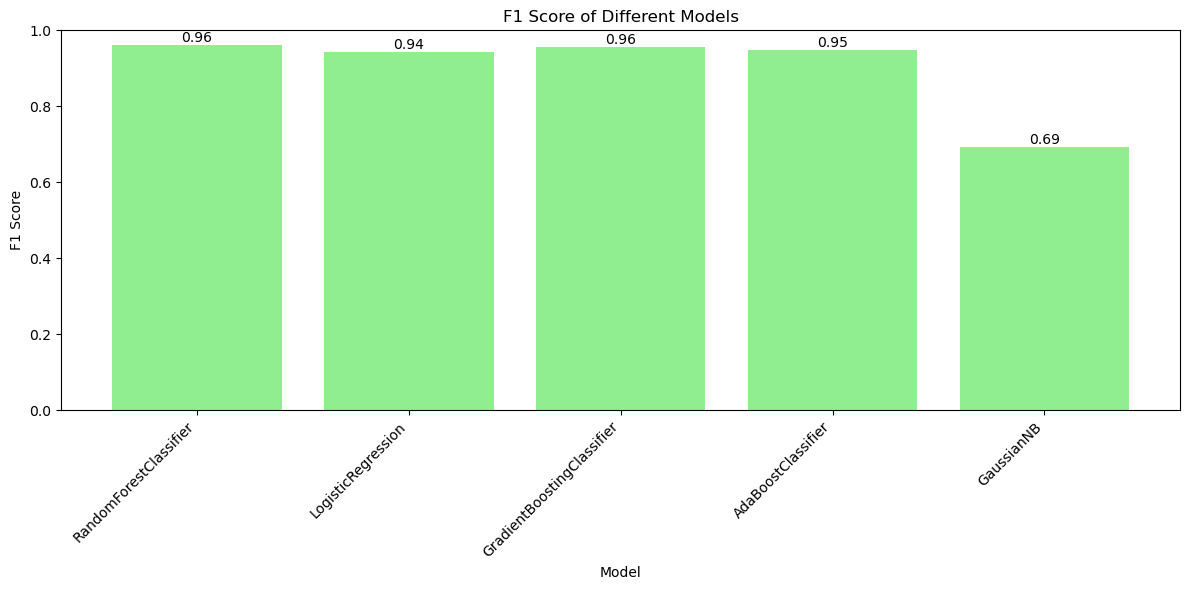

In [20]:
plt.figure(figsize=(12, 6))
bars = plt.bar(models.keys(), accuracyScores, color='blue')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

plt.xticks(rotation=45, ha='right')

for bar, accuracy in zip(bars, accuracyScores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
bars = plt.bar(models.keys(), f1Scores, color='lightgreen')
plt.title('F1 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

plt.xticks(rotation=45, ha='right')

for bar, f1 in zip(bars, f1Scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{f1:.2f}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



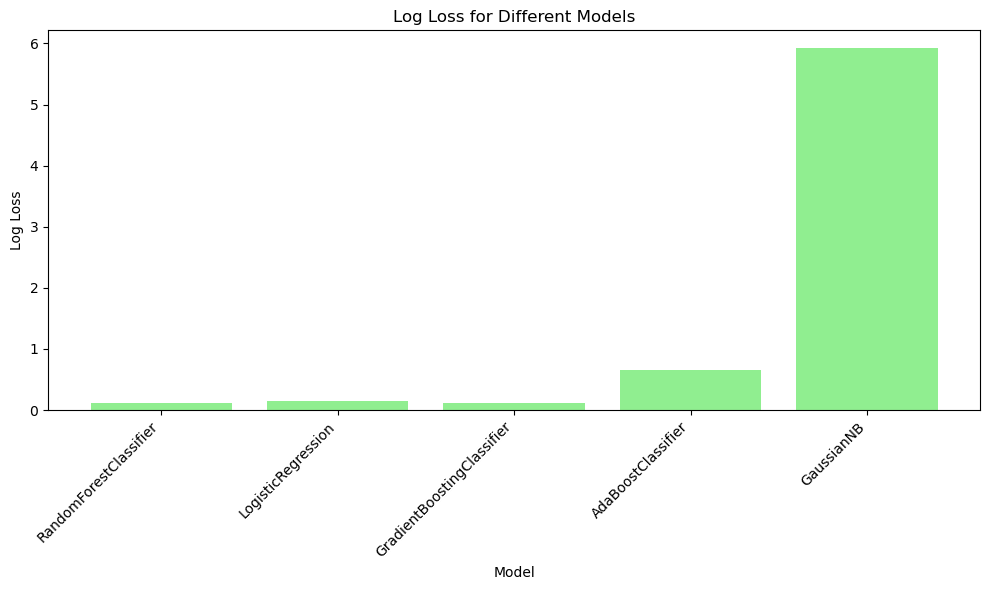

In [19]:
losses = {}
for name, model in models.items():
    try:
        y_pred_proba = model.predict_proba(x_test)
    except AttributeError:
        if isinstance(model, SVC):
            y_pred_proba = model.decision_function(x_test)
        else:
            raise AttributeError(f"Model {name} does not support probability estimates")
    loss = log_loss(y_test, y_pred_proba)
    losses[name] = loss

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(losses.keys(), losses.values(), color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Log Loss')
plt.title('Log Loss for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


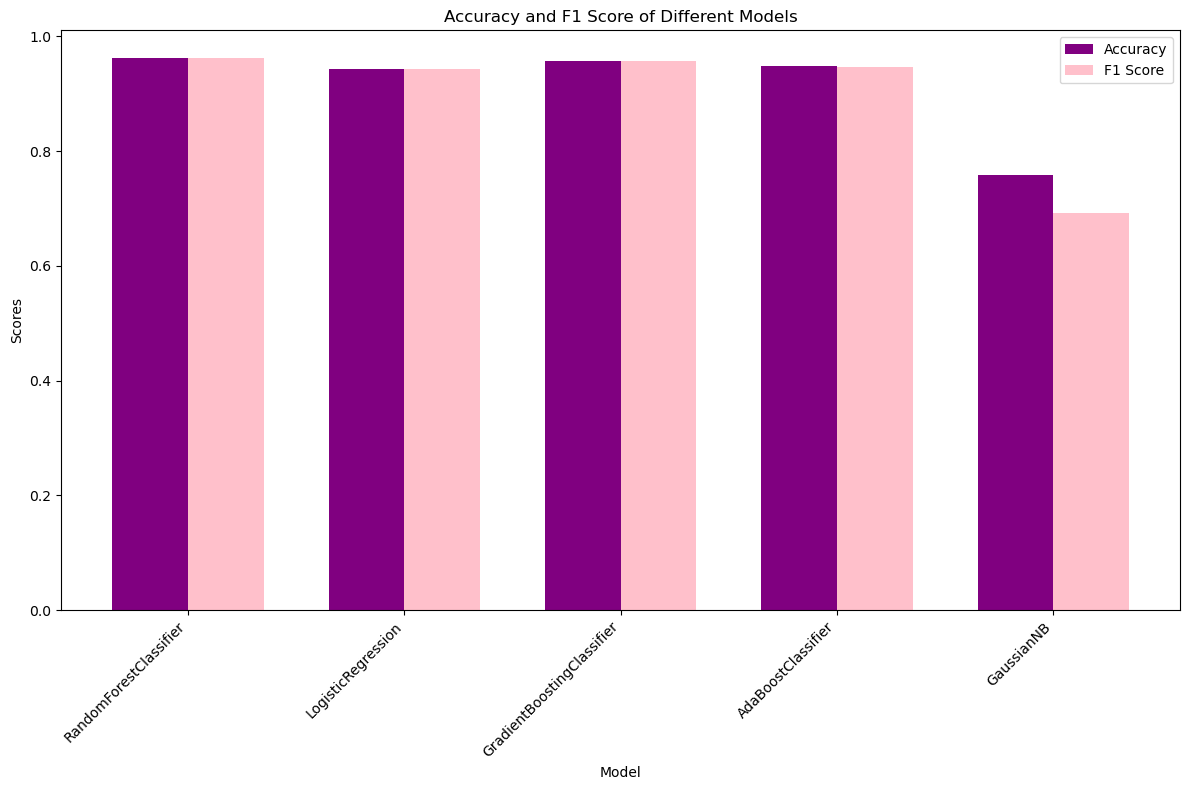

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Data
models_names = list(models.keys())
num_models = len(models_names)
accuracy_scores = np.array(accuracyScores)
f1_scores = np.array(f1Scores)

# Plotting
plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(num_models)

bar1 = plt.bar(index, accuracy_scores, bar_width, label='Accuracy', color='purple')
bar2 = plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='pink')

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score of Different Models')
plt.xticks(index + bar_width / 2, models_names, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


1. **Random Forest Classifier** achieved the highest accuracy of 96.24%. This indicates that Random Forest Classifier performed the best among the models evaluated.

2. **MLP Classifier** achieved an accuracy of 96.15%, which is slightly lower than the Random Forest Classifier but still very competitive.

3. **Gradient Boosting Classifier** achieved an accuracy of 95.71%, making it another strong performer, although slightly lower than Random Forest and MLP classifiers.

4. **K-Nearest Neighbors Classifier** achieved an accuracy of 95.06%, which is also competitive but slightly lower than the top-performing models.

5. **AdaBoost Classifier** and **Logistic Regression** achieved accuracies of 94.79% and 94.36% respectively, indicating solid performance but slightly lower than the top models.

6. **Support Vector Classifier (SVC)** achieved an accuracy of 94.44%, similar to AdaBoost and Logistic Regression.

7. **Gaussian Naive Bayes Classifier (GaussianNB)** achieved an accuracy of 75.77%, which is notably lower compared to the other models. This suggests that GaussianNB may not be as suitable for this classification task based on the given features.

Overall, the Random Forest Classifier emerges as the best model with the highest accuracy, followed closely by MLP Classifier and Gradient Boosting Classifier.

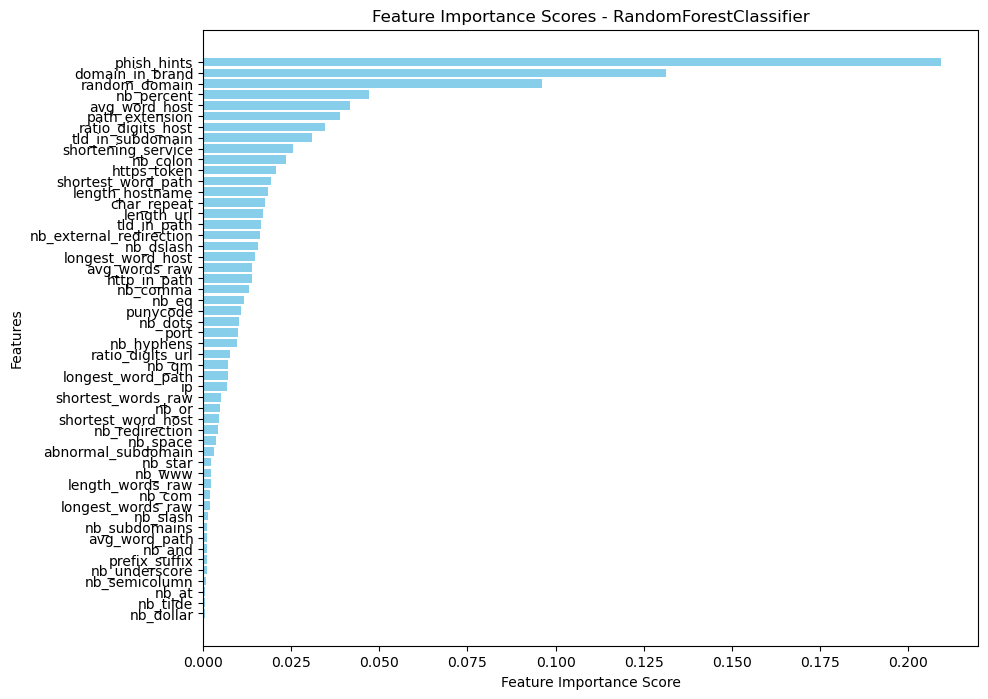

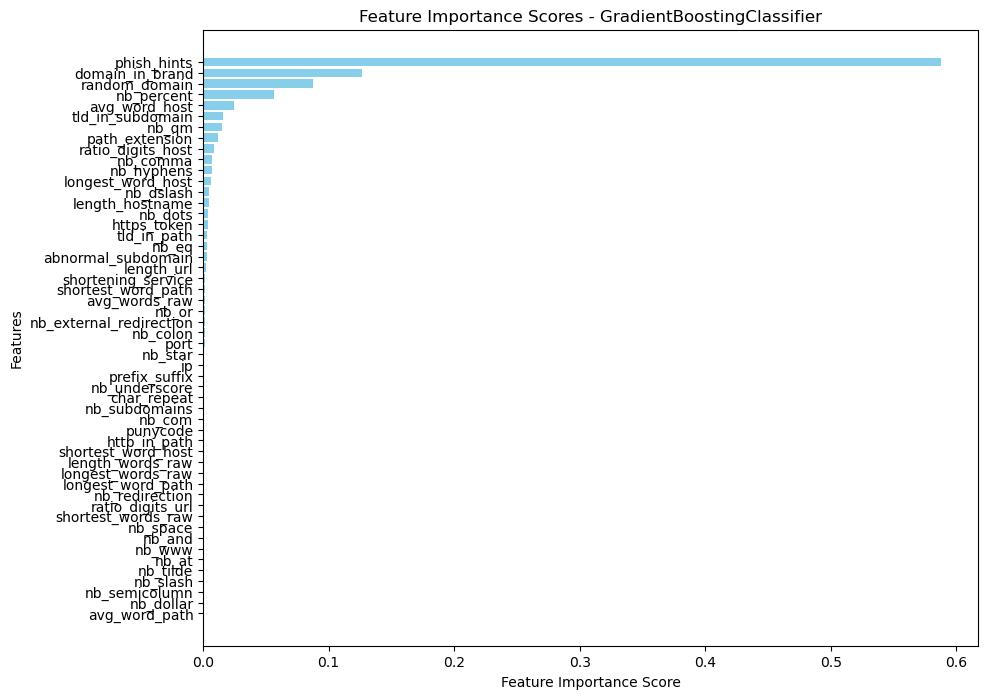

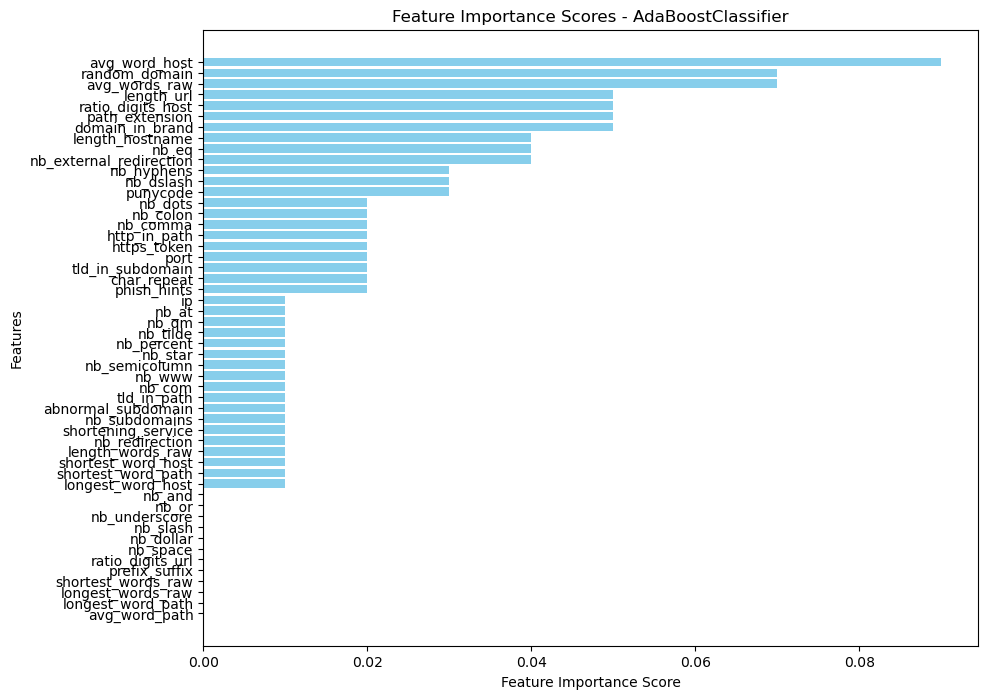

In [22]:
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance_scores = dict(zip(X.columns, model.feature_importances_))
        sorted_indices = sorted(feature_importance_scores, key=feature_importance_scores.get, reverse=True)
        sorted_scores = [feature_importance_scores[feat] for feat in sorted_indices]
        plt.figure(figsize=(10, 8))
        plt.barh(sorted_indices, sorted_scores, color='skyblue')
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title(f'Feature Importance Scores - {name}')
        plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
        plt.show()


Insights:

### Insights:
- `phish_hints` appears to be consistently important across all models, indicating its strong predictive power in determining phishing status.
- Features related to domain characteristics like `domain_in_brand` and `random_domain` are also significant in multiple models.
- Other features such as `avg_word_host`, `avg_words_raw`, and `length_url` also show up among the top features in different models, suggesting their relevance in identifying phishing URLs.
- Some models prioritize certain features more than others, which could be due to the algorithms' inherent characteristics and how they handle feature importance. For example, GradientBoostingClassifier assigns a notably higher importance to `phish_hints` compared to other models.

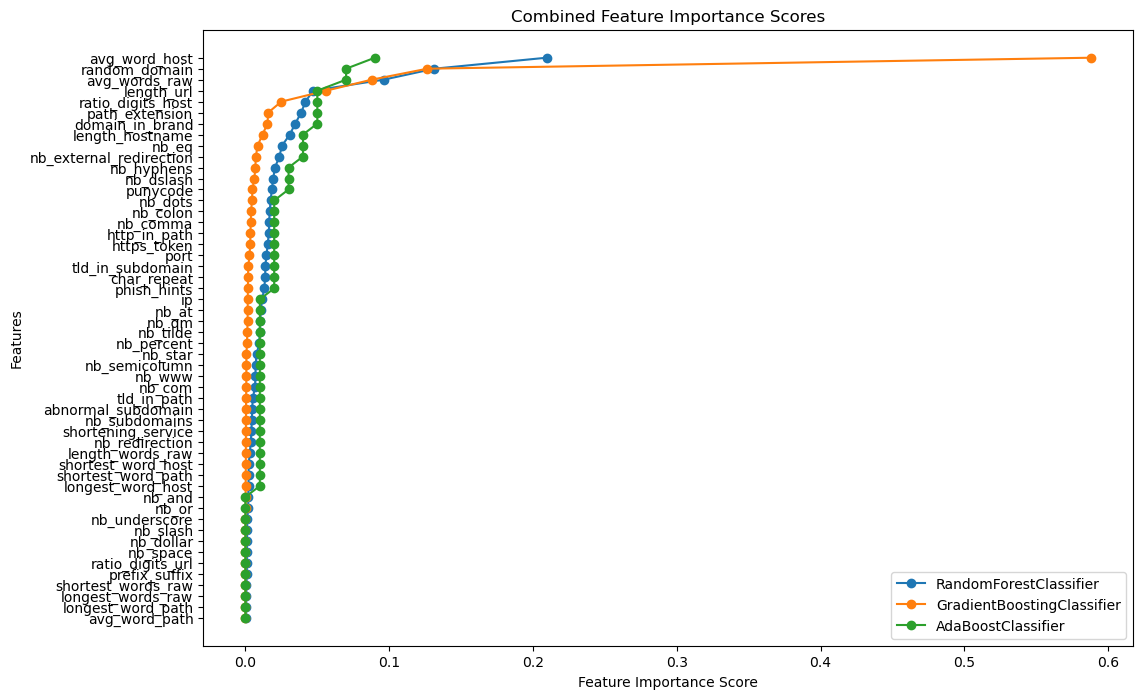

In [23]:
all_feature_importances = []
all_model_names = []
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        feature_importance_scores = dict(zip(X.columns, model.feature_importances_))
        sorted_indices = sorted(feature_importance_scores, key=feature_importance_scores.get, reverse=True)
        sorted_scores = [feature_importance_scores[feat] for feat in sorted_indices]
        all_feature_importances.append(sorted_scores)
        all_model_names.append(name)

plt.figure(figsize=(12, 8))
for feature_importances, model_name in zip(all_feature_importances, all_model_names):
    plt.plot(feature_importances, sorted_indices, label=model_name, marker='o')

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Combined Feature Importance Scores')
plt.legend()
plt.gca().invert_yaxis()
plt.show()